In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

(1350, 1500, 3)


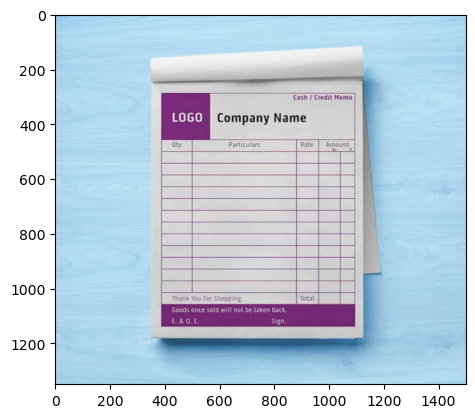

In [35]:
im_path = "./bill.jpg"
# read image from path
img = cv2.imread(im_path)
#image resize
img = cv2.resize(img,(1500,1350))
print(img.shape)
plt.imshow(img)
plt.show()

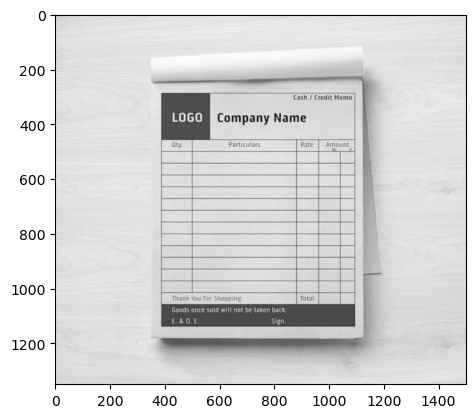

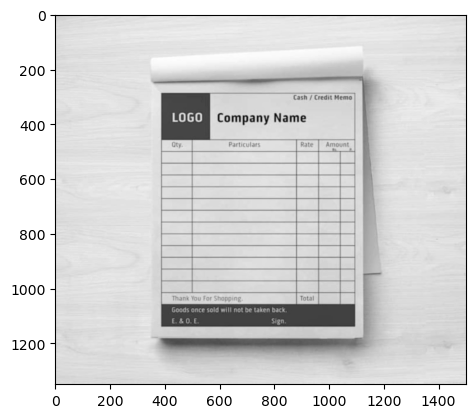

In [36]:
#remove noise
# image blurring
orig = img.copy()
gray = cv2.cvtColor(orig,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap = "gray")
plt.show()

blurred = cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(blurred , cmap= "gray")
plt.show()

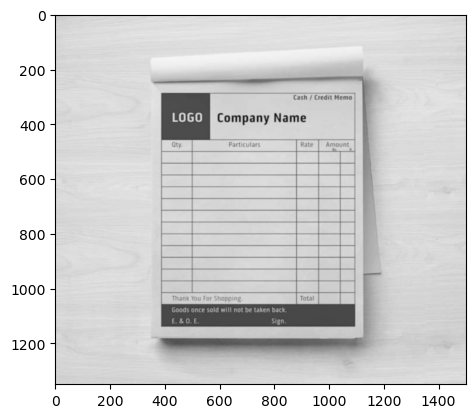

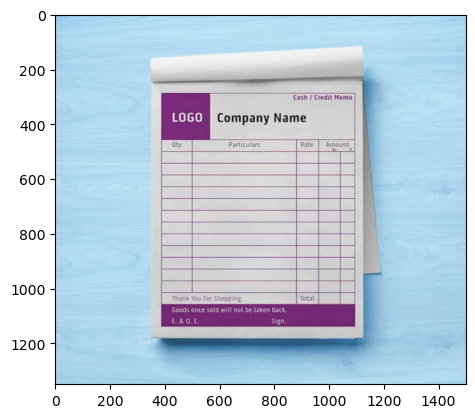

(1350, 1500, 3)

In [37]:
regen = cv2.cvtColor(blurred,cv2.COLOR_GRAY2BGR)
plt.imshow(regen)
plt.show()

plt.imshow(orig)
plt.show()
regen.shape

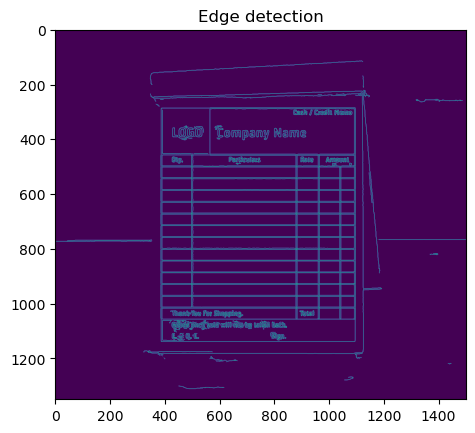

In [38]:
# edge detection
edge = cv2.Canny(blurred,1,50)
orig_edge = edge.copy()
plt.imshow(edge)
plt.title("Edge detection")
plt.show()

In [39]:
#contour extraction
contours,_ = cv2.findContours(edge,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
contours = sorted( contours, reverse = True, key = cv2.contourArea)

In [40]:
#select best contour
for c in contours:
    p = cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c, 0.01*p, True)
    if len(approx) == 4:
        break
        
target = approx              
print(target.shape)

(4, 1, 2)


In [41]:
#reorder target contour
def reorder(h):
    
    h= h.reshape((4,2))
    print(h)
    
    hnew = np.zeros((4,2), dtype = np.float32)
    add = h.sum(axis =1)
    
    hnew[3] = h[np.argmax(add)]
    hnew[1] = h[np.argmax(add)]
    
    diff = np.diff(h,axis = 1)
    
    hnew[0] = h[np.argmax(diff)]
    hnew[2] = h[np.argmax(diff)]
    
    return hnew

In [42]:
reorder = reorder(target)
print("*************")
print(reorder)

[[ 565  292]
 [ 566  457]
 [1093  456]
 [1092  291]]
*************
[[ 566.  457.]
 [1093.  456.]
 [ 566.  457.]
 [1093.  456.]]


In [43]:
#project to a fixed screen
input = reorder
output_map = np.float32([[350,1200],[350,200],[1150,1200],[1150,200]])

In [44]:
M = cv2.getPerspectiveTransform(input, output_map)
ans = cv2.warpPerspective(orig, M,(1150,1200))

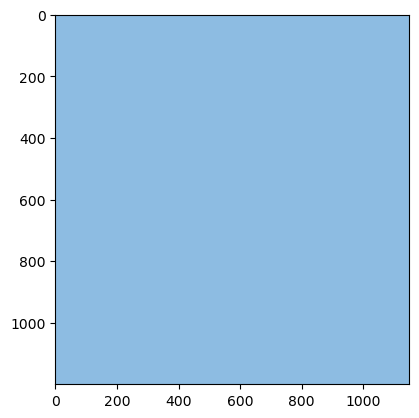

In [46]:
plt.imshow(ans)
plt.show()